This is a project of web scrapping of worldometers page for topic Covid Analysis 

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Using requests library, we can fetch the content from the URL given
and beautiful soup library helps to parse,fetch the details the way we want.
Use requests and Beautiful Soup for scraping and parsing data from the Web.
You can use a beautiful soup library to fetch data using Html tag, class, id,
css selector and many more ways.
Pandas makes it easy to scrape a table (<table> tag) on a web page. 
After obtaining it as a DataFrame, it is of course possible to do various processing
and save it as an Excel file or csv file.

In [4]:
url='https://www.worldometers.info/coronavirus/'

The above is the url we are going to fetch for scrapping the data.

In [6]:
page=requests.get(url)
page

<Response [200]>

with the help of requests if we get the response of 200 it means that we can scrap that page.

<bound method Tag.prettify of 
<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" r
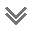

In [8]:
soup=BeautifulSoup(page.text)
soup.prettify

Beautiful Soup then parses the document using the best available parser.
The prettify() method will turn a Beautiful Soup parse tree into 
a nicely formatted Unicode string,with a separate line for each tag and each string

In [9]:
table=soup.find("table",id="main_table_countries_today")

soup.find will find the table tag and id related to required table and store it in table variable

In [10]:
table=table.find('tbody')

Now,the content is present in table and we only required the table body that is in tbody tag.
so we use find tbody.

In [11]:
table

<tbody>
<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>113,185,254</td>
<td>+8,892</td>
<td>1,517,128</td>
<td>+65</td>
<td>106,356,621</td>
<td>+12,414</td>
<td>5,311,505</td>
<td>9,771</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Asia</nobr>
</td>
<td>179,423,658</td>
<td>+430,754</td>
<td>1,459,670</td>
<td>+557</td>
<td>170,588,957</td>
<td>+422,203</td>
<td>7,375,031</td>
<td>13,144</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Asia" style="display:none;">Asia</td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="total_

In [12]:
rows=table.find_all("tr",style="")

next,we find the table's all row which is prsesnt in tr tag and contains style tag 

In [14]:
pandem_info=[]
for i in rows:
    col=i.find_all("td")
    country_info=[c.text for c in col]
    pandem_info.append(country_info)
print(pandem_info)

[['', 'World', '600,114,721', '+520,483', '6,470,229', '+868', '574,115,118', '+554,080', '19,529,374', '44,019', '76,989', '830.1', '', '', '', 'All', '\n', '', '', '', '', ''], ['1', 'USA', '95,324,830', '', '1,065,515 ', '', '90,555,262', '', '3,704,053', '4,391', '', '', '1,096,023,289', '', ' ', 'North America', '', '', '', '', '', ''], ['2', 'India', '44,327,890', '', '527,289 ', '', '43,699,435', '+13,900', '101,166', '698', '31,464', '374', '882,188,283', '626,169', '1,408,865,943 ', 'Asia', '32', '2,672', '2', '', '', '72'], ['3', 'France', '34,319,922', '', '153,501 ', '', '33,674,539', '', '491,882', '869', '523,324', '2,341', '271,490,188', '4,139,790', '65,580,671 ', 'Europe', '2', '427', '0', '', '', '7,500'], ['4', 'Brazil', '34,264,237', '', '682,457 ', '', '33,175,714', '', '406,066', '8,318', '158,797', '3,163', '63,776,166', '295,570', '215,773,337 ', 'South America', '6', '316', '3', '', '', '1,882'], ['5', 'Germany', '31,808,179', '', '146,504 ', '', '30,619,000', 

In [ ]:
Here,We take an empty list and then we take for loop in rows which contains all the tr tags,
and for every tr tag we find all td tags also and then we append the list
which we took as an empty list.

In [ ]:
Number=[]
country=[]
Total_Cases=[]
New_Cases=[]
Total_Deaths=[]
New_Deaths=[]
Total_Recovered=[]
New_Recovered=[]
Active_cases=[]
Critical=[]
Top_cases=[]
Deaths=[]
Total_Tests=[]
Tests=[]
Population=[]
for i in pandem_info:
    Number.append(i[0])
    country.append(i[1])
    Total_Cases.append(i[2])
    New_Cases.append(i[3])
    Total_Deaths.append(i[4])
    New_Deaths.append(i[5])
    Total_Recovered.append(i[6])
    New_Recovered.append(i[7])
    Active_cases.append(i[8])
    Critical.append(i[9])
    Top_cases.append(i[10])
    Deaths.append(i[11])
    Total_Tests.append(i[12])
    Tests.append(i[13])
    Population.append(i[14])

In [ ]:
Now for every column we take an empty list, the data is now present in pandem_info list in form
of another list so we use for loop to iterate over every item of list 
and append each list item using indexing in the following column wise.
And,the list which we took empty will now contain every iterated list items by indexing

In [22]:
Data={'Number':Number,'Country':country,'Total Cases':Total_Cases,'New Cases':New_Cases,
      'Total Deaths':Total_Deaths,'New Deaths':New_Deaths,'Total Recovered':Total_Recovered,
'New_Recovered':New_Recovered,'Active Cases':Active_cases,'Critical':Critical,'Top Cases':Top_cases,
'Deaths':Deaths,'Total Tests':Total_Tests,'Tests':Tests,'Population':Population}

Now we make an Dictionary of key value pair of each list with it's column name 
like "Country" will be the column name for list of country.
Every list will be key of it's respective column names. 

In [23]:
covidInfo=pd.DataFrame(Data)
covidInfo.to_csv('covid.csv',index=False)
covidInfo

,Number,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New_Recovered,Active Cases,Critical,Top Cases,Deaths,Total Tests,Tests,Population
0,,World,"600,114,721","+520,483","6,470,229",+868,"574,115,118","+554,080","19,529,374","44,019","76,989",830.1,,,
1,1,USA,"95,324,830",,"1,065,515",,"90,555,262",,"3,704,053","4,391",,,"1,096,023,289",,
2,2,India,"44,327,890",,"527,289",,"43,699,435","+13,900","101,166",698,"31,464",374,"882,188,283","626,169","1,408,865,943"
3,3,France,"34,319,922",,"153,501",,"33,674,539",,"491,882",869,"523,324","2,341","271,490,188","4,139,790","65,580,671"
4,4,Brazil,"34,264,237",,"682,457",,"33,175,714",,"406,066","8,318","158,797","3,163","63,776,166","295,570","215,773,337"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,220,Montserrat,"1,106",,8,,"1,067",,31,,"221,289","1,601","15,598","3,120,848","4,998"
220,221,Macao,793,,6,,785,,2,,"1,187",9,"7,850","11,749","668,166"
221,222,Wallis and Futuna,761,,7,,438,,316,,"70,326",647,"20,508","1,895,204","10,821"
222,228,Tuvalu,8,,,,,,8,,661,,,,"12,102"


Last step,here we make the dataframe of our dictionary with the help of pandas module,
which has used dictionary 'Data' key as column name and values as its columns and stored it in covidInfo variable
and also converted it to csv(comma separated files) - CSV files contains plain text 
and is a well know format that can be read by everyone including Pandas